In [1]:

from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re

In [2]:
path = 'D:/CCFinder/So Posts/'
so_list = os.listdir(path)
print(len(so_list))
so_list[:5]

1355616


['0.txt', '1.txt', '10.txt', '100.txt', '1000.txt']

In [3]:
date_dict = dict()
for file in tqdm(so_list):
    with open(path+file, 'r', encoding='utf-8') as f:
        line = f.readline()
        # year
        CreationDate = int(re.findall(r'CreationDate = (.*?)//',line)[0][:4])
        if CreationDate not in date_dict.keys():
            date_dict[CreationDate] = 1
        else:
            date_dict[CreationDate] += 1



100%|██████████| 1355616/1355616 [21:32<00:00, 1048.49it/s]


In [5]:
sum(date_dict[i] for i in date_dict.keys())

1355616

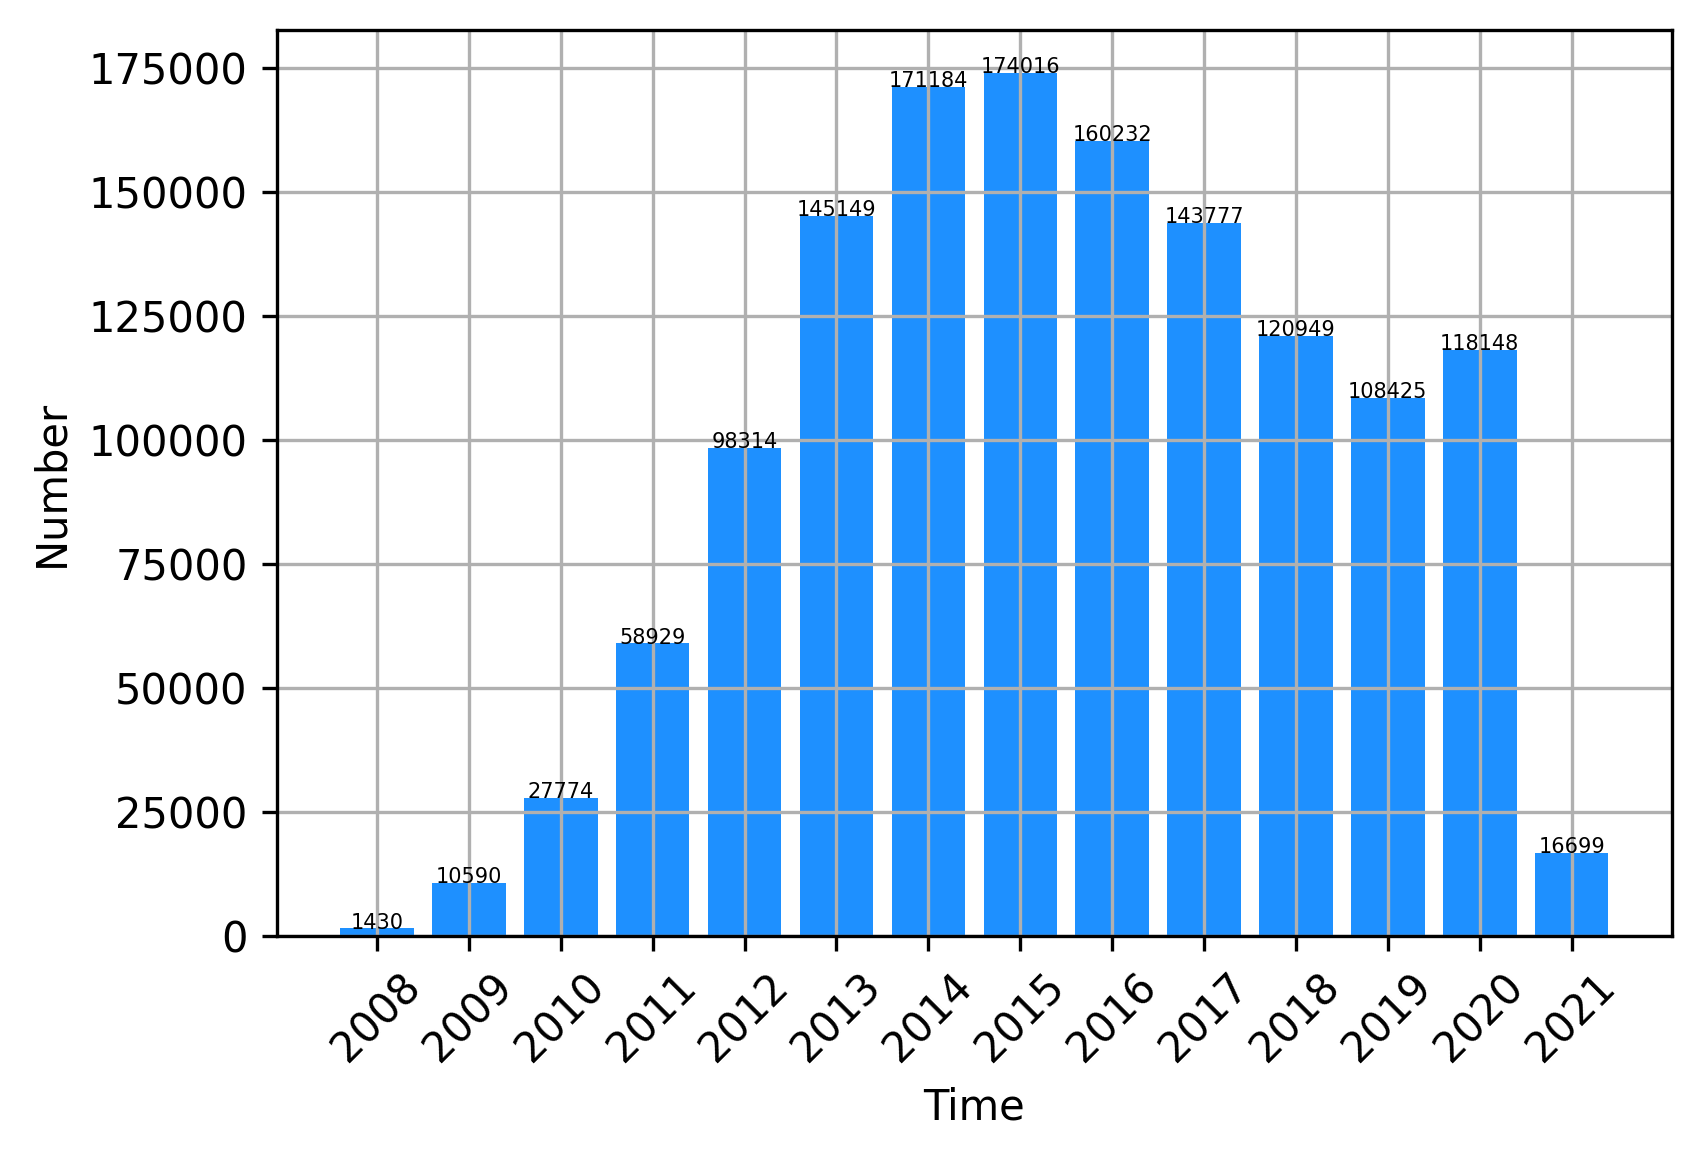

In [6]:
# data
import matplotlib.pyplot as plt
x = [i for i in range(len(date_dict))]
y = [date_dict[i] for i in range(2008, 2022)]
plt.figure(dpi=300)
# draw

plt.bar(x,y,align="center",color="#1E90FF",tick_label=[i for i in range(2008,2022)],alpha=1.0)
for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b+50,str(y[i]),ha='center',fontsize=5)
plt.xlabel("Time")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.grid()
plt.savefig('./pic/so_time_distribution.jpg',bbox_inches = 'tight')
